Descripción del Conjunto de Datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                1362 non-null   int64  
 1   Age                   1362 non-null   int64  
 2   Income                1362 non-null   float64
 3   Spending_Score        1362 non-null   float64
 4   Membership_Years      1362 non-null   int64  
 5   Purchase_Frequency    1362 non-null   float64
 6   Last_Purchase_Amount  1362 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 74.6 KB
None

Estadísticas Descriptivas:
            Number          Age        Income  Spending_Score  \
count  1362.000000  1362.000000   1362.000000     1362.000000   
mean    681.500000    43.251836  48317.193784     9765.372547   
std     393.319844    12.533236  12648.638324     2531.133100   
min       1.000000    18.000000  19946.675740     4064.1

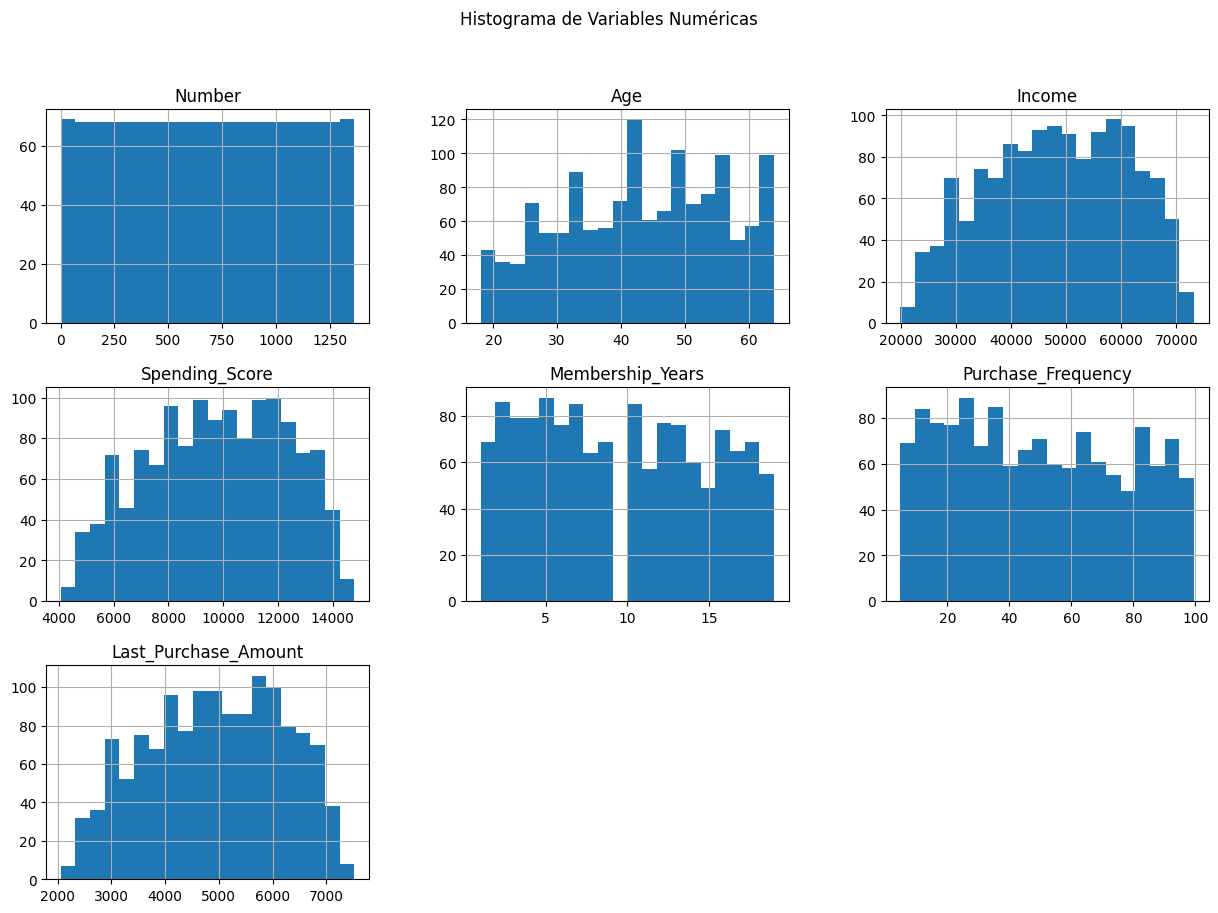


Identificación de Outliers con Boxplot:


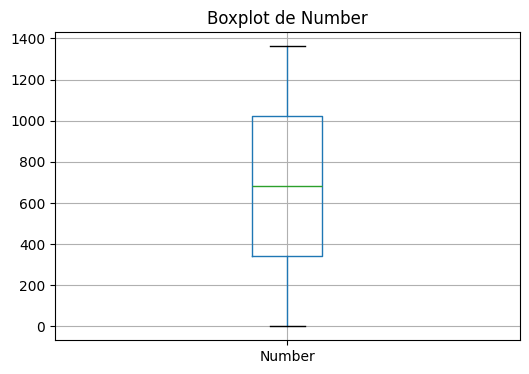

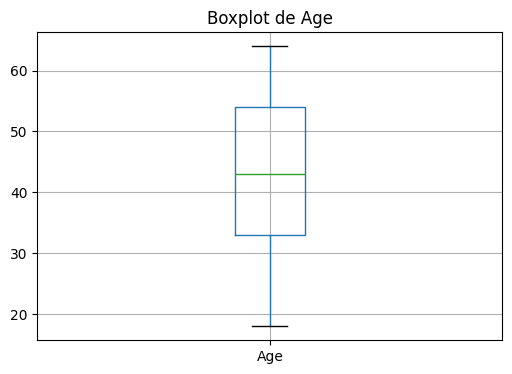

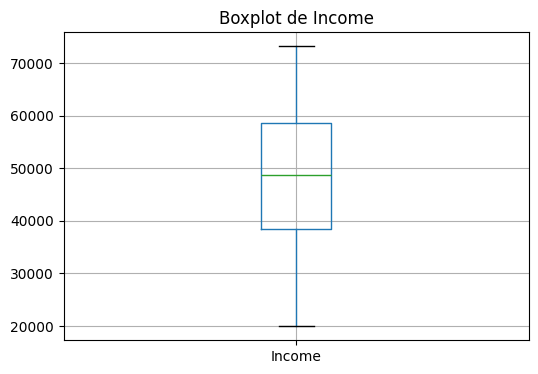

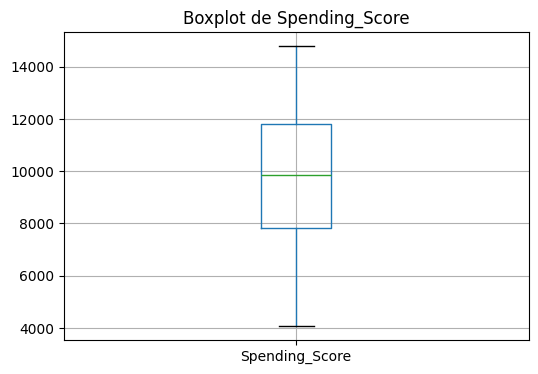

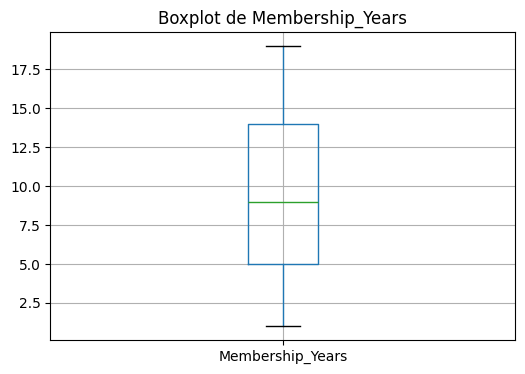

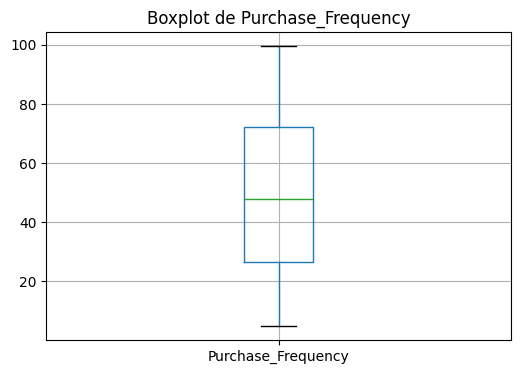

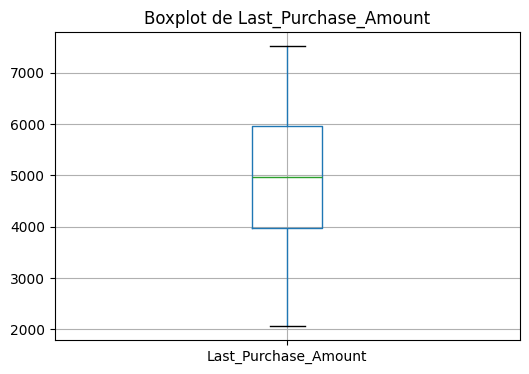


Mapa de Calor de Correlaciones:


<Figure size 1200x800 with 0 Axes>

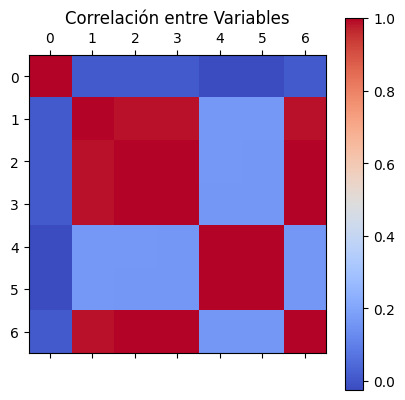


Valores Nulos:
Number                  0
Age                     0
Income                  0
Spending_Score          0
Membership_Years        0
Purchase_Frequency      0
Last_Purchase_Amount    0
dtype: int64

Identificación de Outliers:
Número de outliers en cada columna: Number                  0
Age                     0
Income                  0
Spending_Score          0
Membership_Years        0
Purchase_Frequency      0
Last_Purchase_Amount    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                1362 non-null   int64  
 1   Age                   1362 non-null   int64  
 2   Income                1362 non-null   float64
 3   Spending_Score        1362 non-null   float64
 4   Membership_Years      1362 non-null   int64  
 5   Purchase_Frequency    1362 non-null   float64
 6   Last_Purch

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Cargar el dataset
dataset = pd.read_csv("C:/Users/sopor/Desktop/Curso Coding Dojo/Machine Learning/Proyecto 2/Costumer/Customer Purchase Data.csv")

# Funcion para realizar un analisis exploratorio inicial
def eda_inicial(dataset):
    # Descripcion del conjunto de datos
    # Informacion general sobre el dataset
    print("Descripcion del Conjunto de Datos:")
    print(dataset.info())
    # Estadisticas descriptivas basicas
    print("\nEstadisticas Descriptivas:")
    print(dataset.describe())

    # Analisis de variables categoricas, Numeros de caloress unicos
    print("\nDistribucion de Variables Categoricas:")
    print(dataset.select_dtypes(include='object').nunique()) 

    # Visualizaciones
    print("\nVisualizaciones:")
    # Histograma para variables numericas
    dataset.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Histograma de Variables Numéricas")
    plt.show()

    # Grafico de barras para variables categoricas
    for column in dataset.select_dtypes(include='object'):
        plt.figure(figsize=(10, 6))
        dataset[column].value_counts().plot(kind='bar')
        plt.title(f'Distribucion de {column}')
        plt.show()

    # Boxplot para detectar outliers
    print("\nIdentificacion de Outliers con Boxplot:")
    for column in dataset.select_dtypes(include='number'):
        plt.figure(figsize=(6, 4))
        dataset.boxplot(column=column)
        plt.title(f'Boxplot de {column}')
        plt.show()

    # Mapa de calor para ver correlaciones
    print("\nMapa de Calor de Correlaciones:")
    plt.figure(figsize=(12, 8))
    corr = dataset.corr()
    plt.matshow(corr, cmap='coolwarm')
    plt.colorbar()
    plt.title('Correlacion entre Variables')
    plt.show()

    # Identificacion de valores nulos y mostrar cantidad
    print("\nValores Nulos:")
    print(dataset.isnull().sum())

    # Identificacion de outliers utilizando Z-score y eliminacion de NaN
    print("\nIdentificacion de Outliers:")
    z_scores = stats.zscore(dataset.select_dtypes(include='number').dropna())  
    outliers = (z_scores > 3).sum(axis=0)
    print(f'Nomero de outliers en cada columna: {outliers}')

# Funcion para guardar los hallazgos en un archivo
def guardar_hallazgos(hallazgos, filename='hallazgos_eda.txt'):
    with open(filename, 'w') as f:
        f.write(hallazgos)

# Ejemplo de como usar estas funciones
def realizar_eda(dataset):
    eda_inicial(dataset)

    # Guardar los hallazgos
    hallazgos = "Este es un ejemplo de los hallazgos del EDA.\n"
    hallazgos += f"Descripcion del dataset: {dataset.info()}\n"
    hallazgos += f"Estadisticas descriptivas: {dataset.describe()}\n"
    
    guardar_hallazgos(hallazgos)

# Llamada de la funcion
realizar_eda(dataset)